# Credit Card Fraud Detection

Welcome to my project on **Credit Card Fraud Detection** – where data meets detective work!  
In today’s digital world, fraudsters are constantly finding new ways to sneak through financial systems. This project explores how we can stay a step ahead by using **machine learning** to detect suspicious transactions with precision and speed.

---

## Why This Project?

Credit card fraud costs the global economy billions every year. For banks and customers alike, even a single undetected fraudulent transaction can have huge consequences. The goal here is to build a **robust fraud detection model** that not only flags malicious activity but does so with minimal false alarms – ensuring peace of mind and financial safety.

---

## About the Dataset:

The dataset used in this project is from [Kaggle's Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  
Here are the key points:

- **Source**: European credit card transactions made in September 2013.
- **Size**: 284,807 transactions across 2 days, of which only 492 are fraudulent.
- **Challenge**: **Highly imbalanced data** – fraud makes up just **0.172%** of all transactions.
- **Features**: All anonymized via **PCA** except for `'Time'` and `'Amount'`.
- **Target**: The `'Class'` column — 1 for fraud, 0 for legitimate.

---

## Roadmap -

This project was a full pipeline of **exploration, cleaning, modeling**, and **evaluation**:

- **Exploratory Data Analysis (EDA)**: Univariate & Bivariate analysis, trend visualizations, and understanding feature distributions.
- **Imbalance Handling**: Tackled class imbalance with smart evaluation metrics like **Precision-Recall AUC** and **F1-Score**.
- **Outlier Detection**: Identified and treated outliers for stable model performance.
- **Dimensionality Reduction**: Applied PCA visualization for better understanding of feature space.
- **Algorithms Used**:
  - **K-Nearest Neighbors (KNN)**
  - **Logistic Regression**
  - **Support Vector Machines (SVM)**
- **Hyperparameter Tuning**:
  - Used **GridSearchCV** and **Optuna** for optimizing model parameters.
- **Evaluation Metrics**:
  - F1-Score, Confusion Matrix, ROC Curve, and Precision-Recall.

---

## Key Challenges:

The biggest hurdle? **Imbalanced Data.**  
Most transactions were legit, and fraud cases were extremely rare – making traditional accuracy metrics misleading. I also had to carefully **handle outliers** and ensure the models didn't get biased toward the majority class.

---

## Why It Was Fun

This project felt like solving a mystery! Every step—from diving into raw data to tuning models—required careful thought and experimentation. It was especially rewarding to watch the model evolve from an imprecise guesser to a reliable fraud detector. The perfect blend of **data science, finance, and detective work**!

---

## Tools & Concepts Explored

- Python (NumPy, Pandas, Matplotlib, Seaborn)
- Scikit-learn (Modelling, Metrics, Pre-Processing, GridSearchCV)
- Optuna (Advanced hyperparameter tuning)
- PCA and TruncatedSVD (Dimensionality Reduction)
- Imbalanced Data (Evaluation Techniques)

---

Let’s dive in! 🔍

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Background:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot have the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Go ahead and run the following cells to get started with data

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv


In [62]:
df = pd.read_csv('creditcard.csv')

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [65]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [66]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [67]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [68]:
df.duplicated().sum()/len(df)

np.float64(0.00379555277784605)

## Interpretation:
As we can see, there are no null values. Even duplicated values are almost null. This shows that the data can now be further worked on. 
Next, I have calculated the percentage of data in each class. This shows that the data is balanced or imbalanced. (In this case it is highly imbalanced data.)

In [69]:
fraud = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud = round(len(df[df['Class']==0])/len(df)*100,2)

print("No fraud transactions are:",str(nofraud)+'%',"of the dataset")
print("Fraud transactions are:",str(fraud)+'%',"of the dataset")

No fraud transactions are: 99.83% of the dataset
Fraud transactions are: 0.17% of the dataset


## Analysis:

***UNIVARIATE ANALYSIS***

Univariate analysis generally refers to the data analysis where there is only one dependent variable. The main goal of the univariate analysis is to summarize the data. We can easily identify measures of central tendency like mean, median, mode, the quartiles, and the standard deviation.

To start our data analysis we are going to do univariate and bivariate analysis, taking the following as features we are going to do out univariate analysis first.

1. Class
2. Amount
3. Transaction time
4. all the remaining features[V1....V28]

We can see that our class variable is highly imbalanced as we already know

Text(0.5, 1.0, '0: Non-fraudulent, 1: Fraudulent')

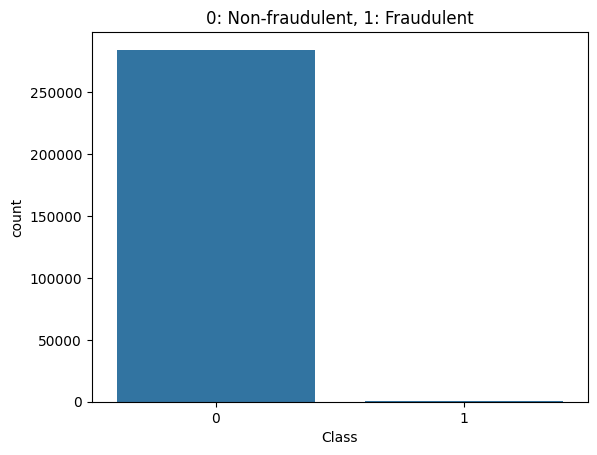

In [70]:
sns.countplot(x='Class',data=df)
plt.title("0: Non-fraudulent, 1: Fraudulent")

The amount variable is mostly dense around the smaller amount regions.

Text(0.5, 1.0, 'Distribution of Amount')

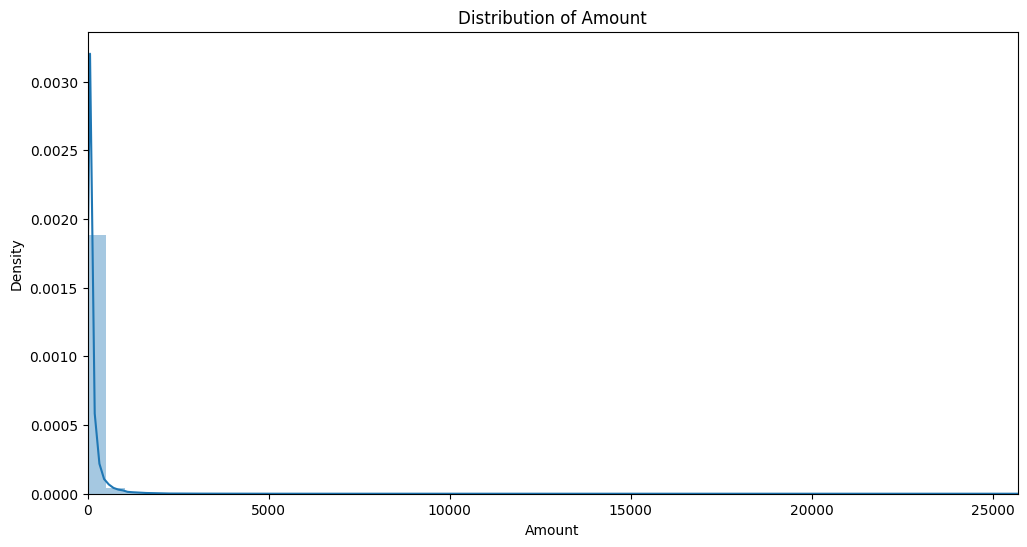

In [71]:
amount_val = df['Amount'].values
plt.figure(figsize = (12,6))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title("Distribution of Amount")

Time has **bimodal distribution** i.e. the peak rises and falls down and rises again. The fall might happen due to night time.

Text(0.5, 1.0, 'Distribution of transaction time')

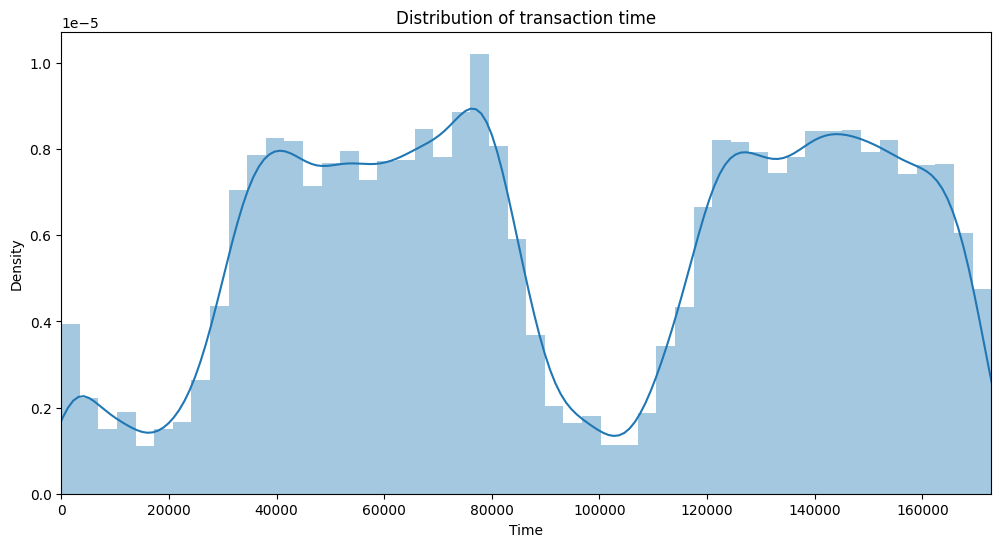

In [72]:
time_val = df['Time'].values
plt.figure(figsize=(12,6))
sns.distplot(df['Time'])
plt.xlim(min(time_val),max(time_val))
plt.title("Distribution of transaction time")

And similarly we have plotted all our features individually and the intersting inferences from them are listed below-

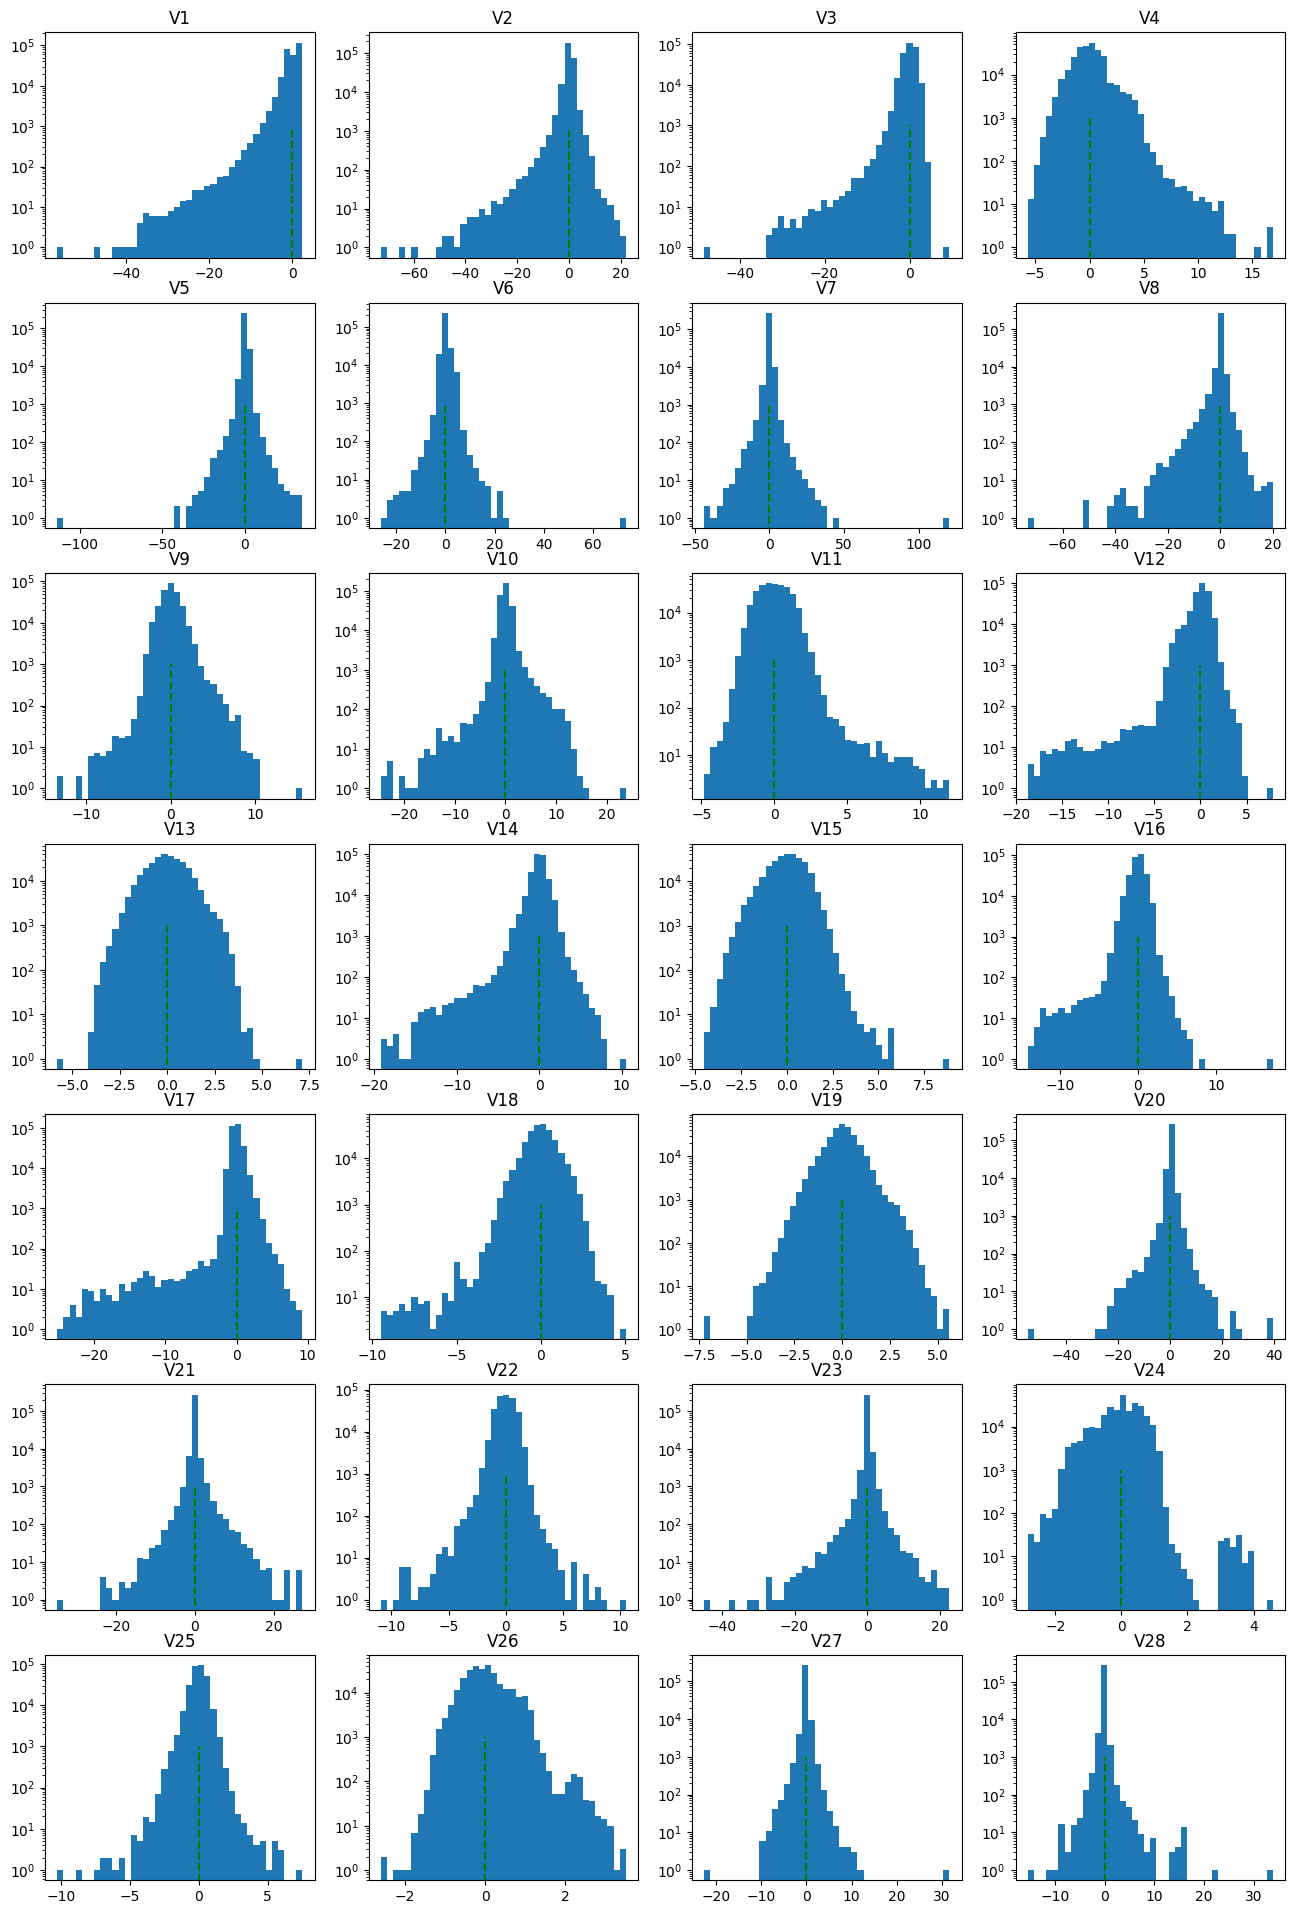

In [73]:
fig, ax = plt.subplots(nrows=7,ncols=4,figsize=(16,24))

for i in range(1,29):
  m = (i-1)//4
  n = (i-1)%4
  col = 'V' + str(i)
  ax[m,n].hist(df[col],bins=40)
  ax[m,n].set_title(col)
  ax[m,n].vlines(x=df[col].mean(),ymin=0,ymax=10**3,linestyle='dashed',colors='g')
  ax[m,n].set_yscale('log')

***BIVARIATE ANALYSIS***

Bivariate analysis happens between 2 variables to identify the relationship between them.

For our bivariate data analysis, we are going to take the following as features-
- Class
- Amount
- Transaction time
- all the remaining features[V1....V28]

It can be cleared observed that there are very less data points having amount greater than 10,000(all in the non-fraudulent category), hence we can exclude these from our dataset.

Text(0.5, 1.0, 'Amount vs Class')

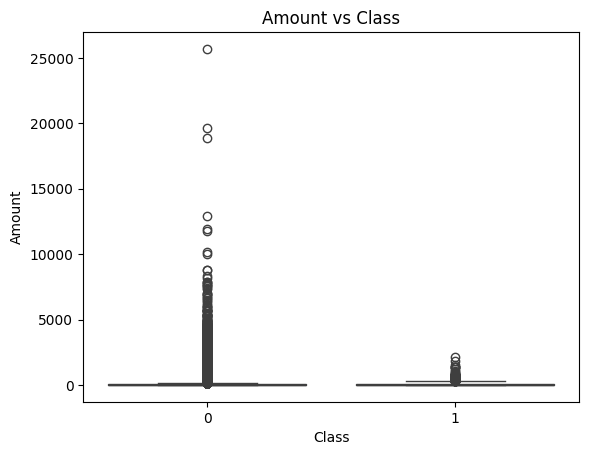

In [74]:
#class vs amount
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')

In [75]:
#checking the above observation
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [76]:
#excluding the above mentioned points
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

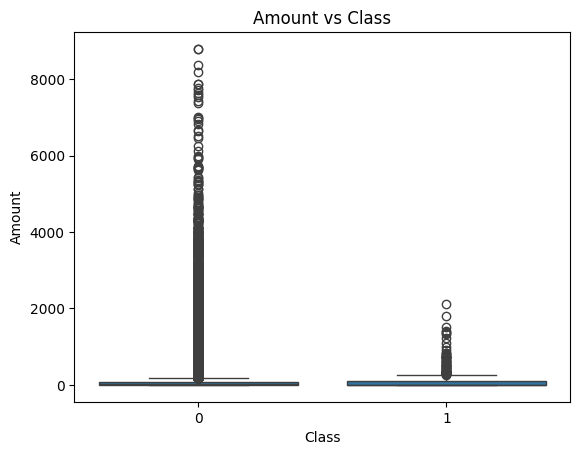

In [77]:
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')

Let's add "Time_min"(minute) and "Time_hour"(hour) column to our data for to see if we can get some more insigths.

In [78]:
data_new = df
timedelta = pd.to_timedelta(data_new['Time'],unit='s')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

So as we can see transactions both fraud and legitimate are more or less uniformly distributed throughout Time_min.

Text(0.5, 1.0, 'Amounts by Minutes of Frauds and Normal Transactions')

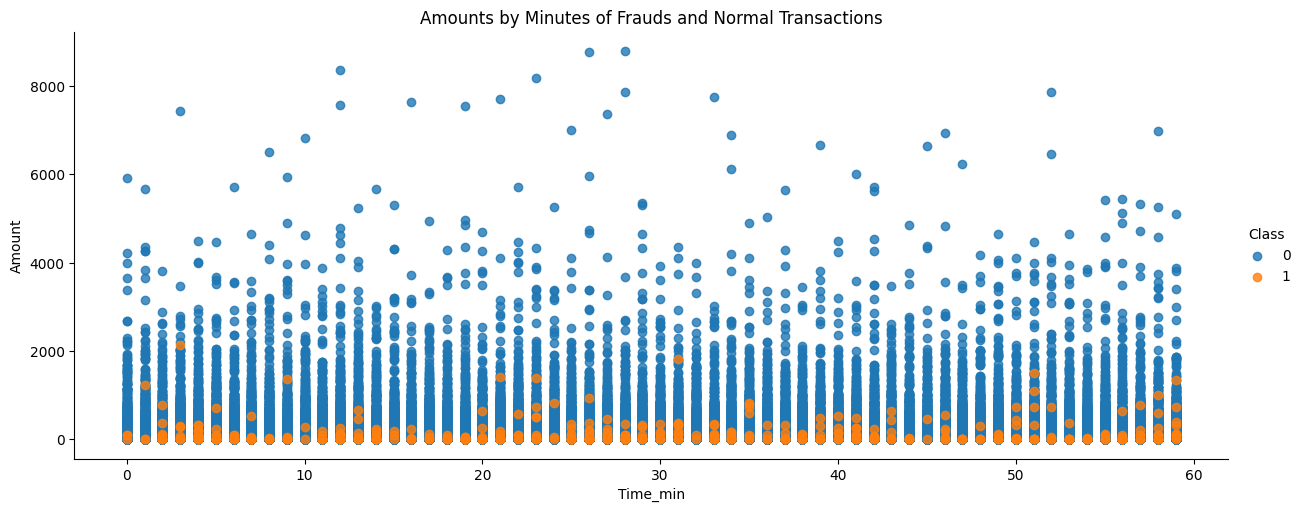

In [79]:
ax = sns.lmplot(y='Amount',x='Time_min',fit_reg=False, aspect=2.5, data=data_new,hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)

Now transactions show a more non uniform disribution accross Time_hour which makes sense but still we see no particular pattern to distinguish fraud and non-fraud from this analysis, non-fraud volume is more on active hour compared to lean hours.

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

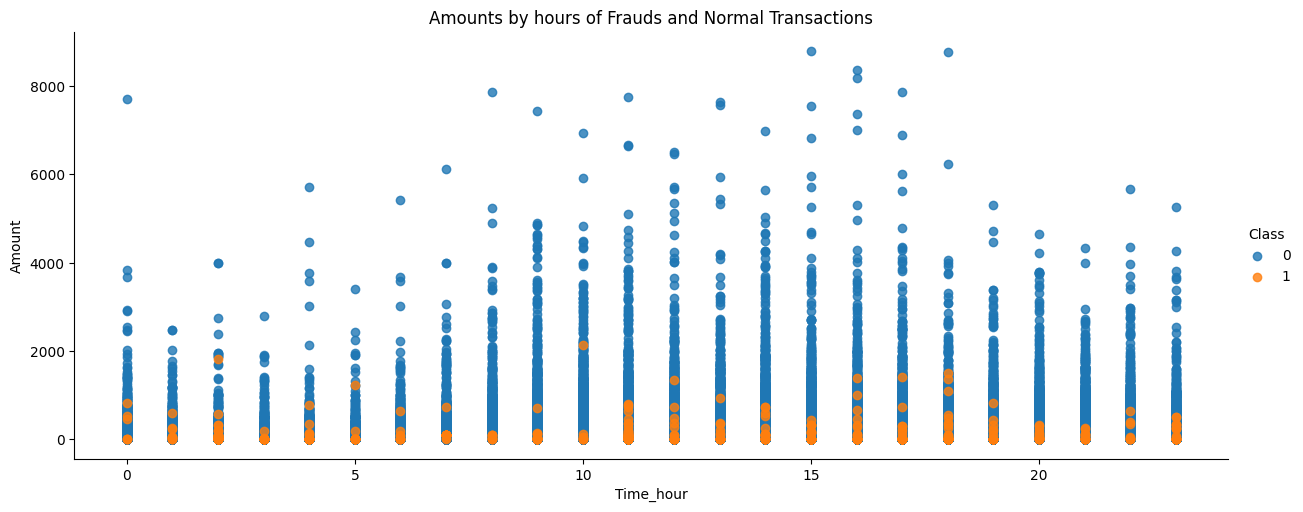

In [80]:
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)

This confirms the pattern oberserved above about non-fraud and also shows that fraud transactions are much more uniform accorss the day.

(-1.0, 25.0)

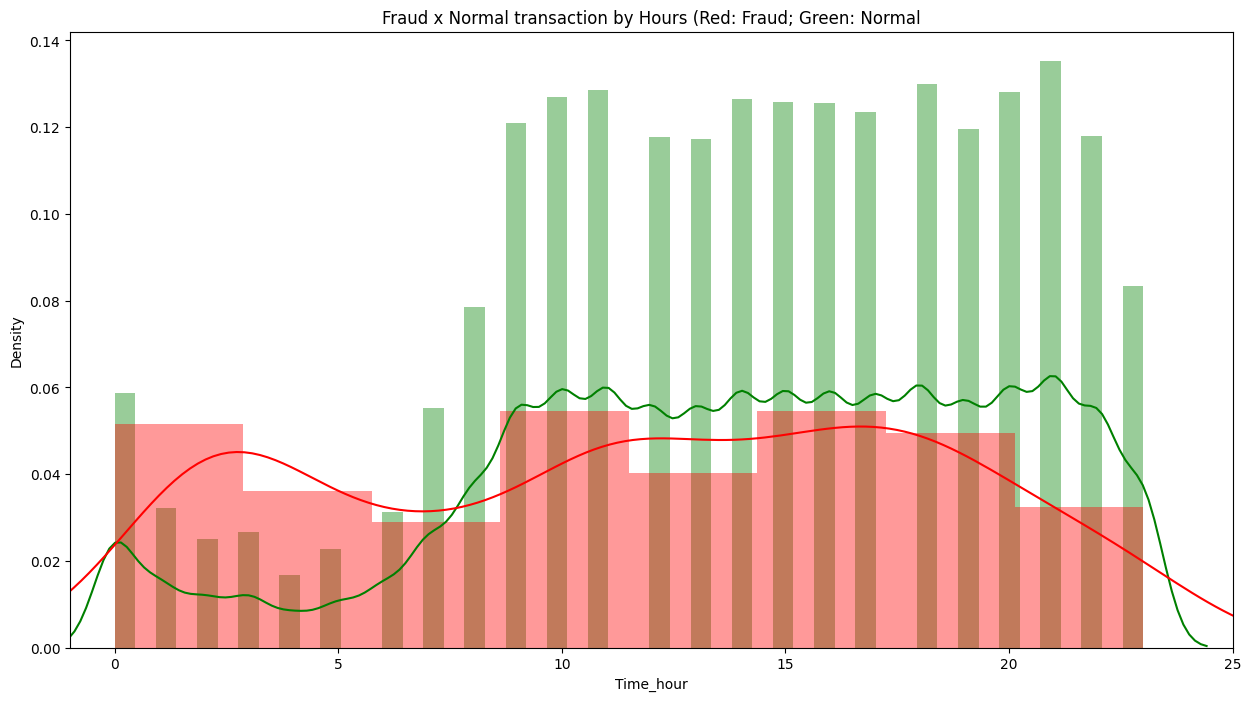

In [81]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal transaction by Hours (Red: Fraud; Green: Normal',fontsize=12)
plt.xlim([-1,25])


## CONCLUSIONS FROM EDA-

1. The data consisted of around 2,85,000 data points, 30 features including time and amount, and the labelled class of whether a transaction is actually fraud or not.
2. There were no null values present in the original dataset, but the data was highly skewed, with 99.83% of the data points being non-fraudulent transactions.
3. The time feature had a bimodal distribution, i.e. peaks falling and rising. I have concluded that the peaks might fall due to fewer transactions during nighttime.
4. A very small proportion of transactions had amounts > 10,000, hence they were eliminated from the dataset.
5. Most of the fraudulent transactions were of small amounts (<1000 units - since we don’t know about the units about the currency).
6. The occurrence of fraudulent transactions was independent of the time of the day.

## Data Preprocessing-

1. **Feature Scaling:** (Using Robust Scalar)-
Since fraud transactions which are also low in number have relatively smaller value(amount) so we need to have our data scaled, We are going to use robust scalar to scale our data.

In [82]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [83]:
df.drop(['Time_min','Time_hour'],axis=1,inplace=True)

In [84]:
#inserting these scaled column at 0th index
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.783399,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-0.269843,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,4.984069,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.418390,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.670626,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. **Spliting the Dataset:** Splitting data is the first step to model training and here we are using *StratifiedKFold*, it maintains the class distribution in training and test data which is much needed in imbalanced distribution like ours.:

In [85]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index, test_index in sss.split(X,y):
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index],y.iloc[test_index]

#converting it into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#check if both train and test distributions are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest,return_counts=True)

print("Label dstributions: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Label dstributions: 

[0.99827072 0.00172928]
[0.99827946 0.00172054]


3. **UnderSampling to make the Dataset Balanced-** Since our classes are highly skewed, we have to make them equivalent in occurrence to have a normal distribution of the classes, and shuffle the data before creating the sub-samples. Basically, make the majority class of the output rows equal to the minority class rows.

In [86]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157484,-0.302404,109960.0,0.004422,1.407026,0.376942,2.296648,2.151622,0.274688,1.300522,-0.358004,...,0.153249,0.768625,-0.166878,0.015505,-0.774482,-0.224772,0.012136,0.030346,0.36,0
42700,0.115428,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1
176871,0.952767,122947.0,-0.974125,0.201652,-0.921452,-0.680426,0.713932,0.866019,0.416674,0.760560,...,-0.072731,-0.030600,0.510336,-1.447096,-0.873328,0.255194,-0.027827,0.032514,90.18,0
83053,-0.219816,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
68633,-0.290945,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1


In [87]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


4. **CORRELATION HEAT MAP-**
*Correlation* is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependence between two different variables. If there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix.

We look at the correlation matrix in original distribution and later used balanced data it shows no much correlation between features or classes for orginal distribution but on balanced set we can visualize correlation more easily, so we find out features highly correlated(positively/negatively) and do outlier detection and removal from them for our data preperation.

Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

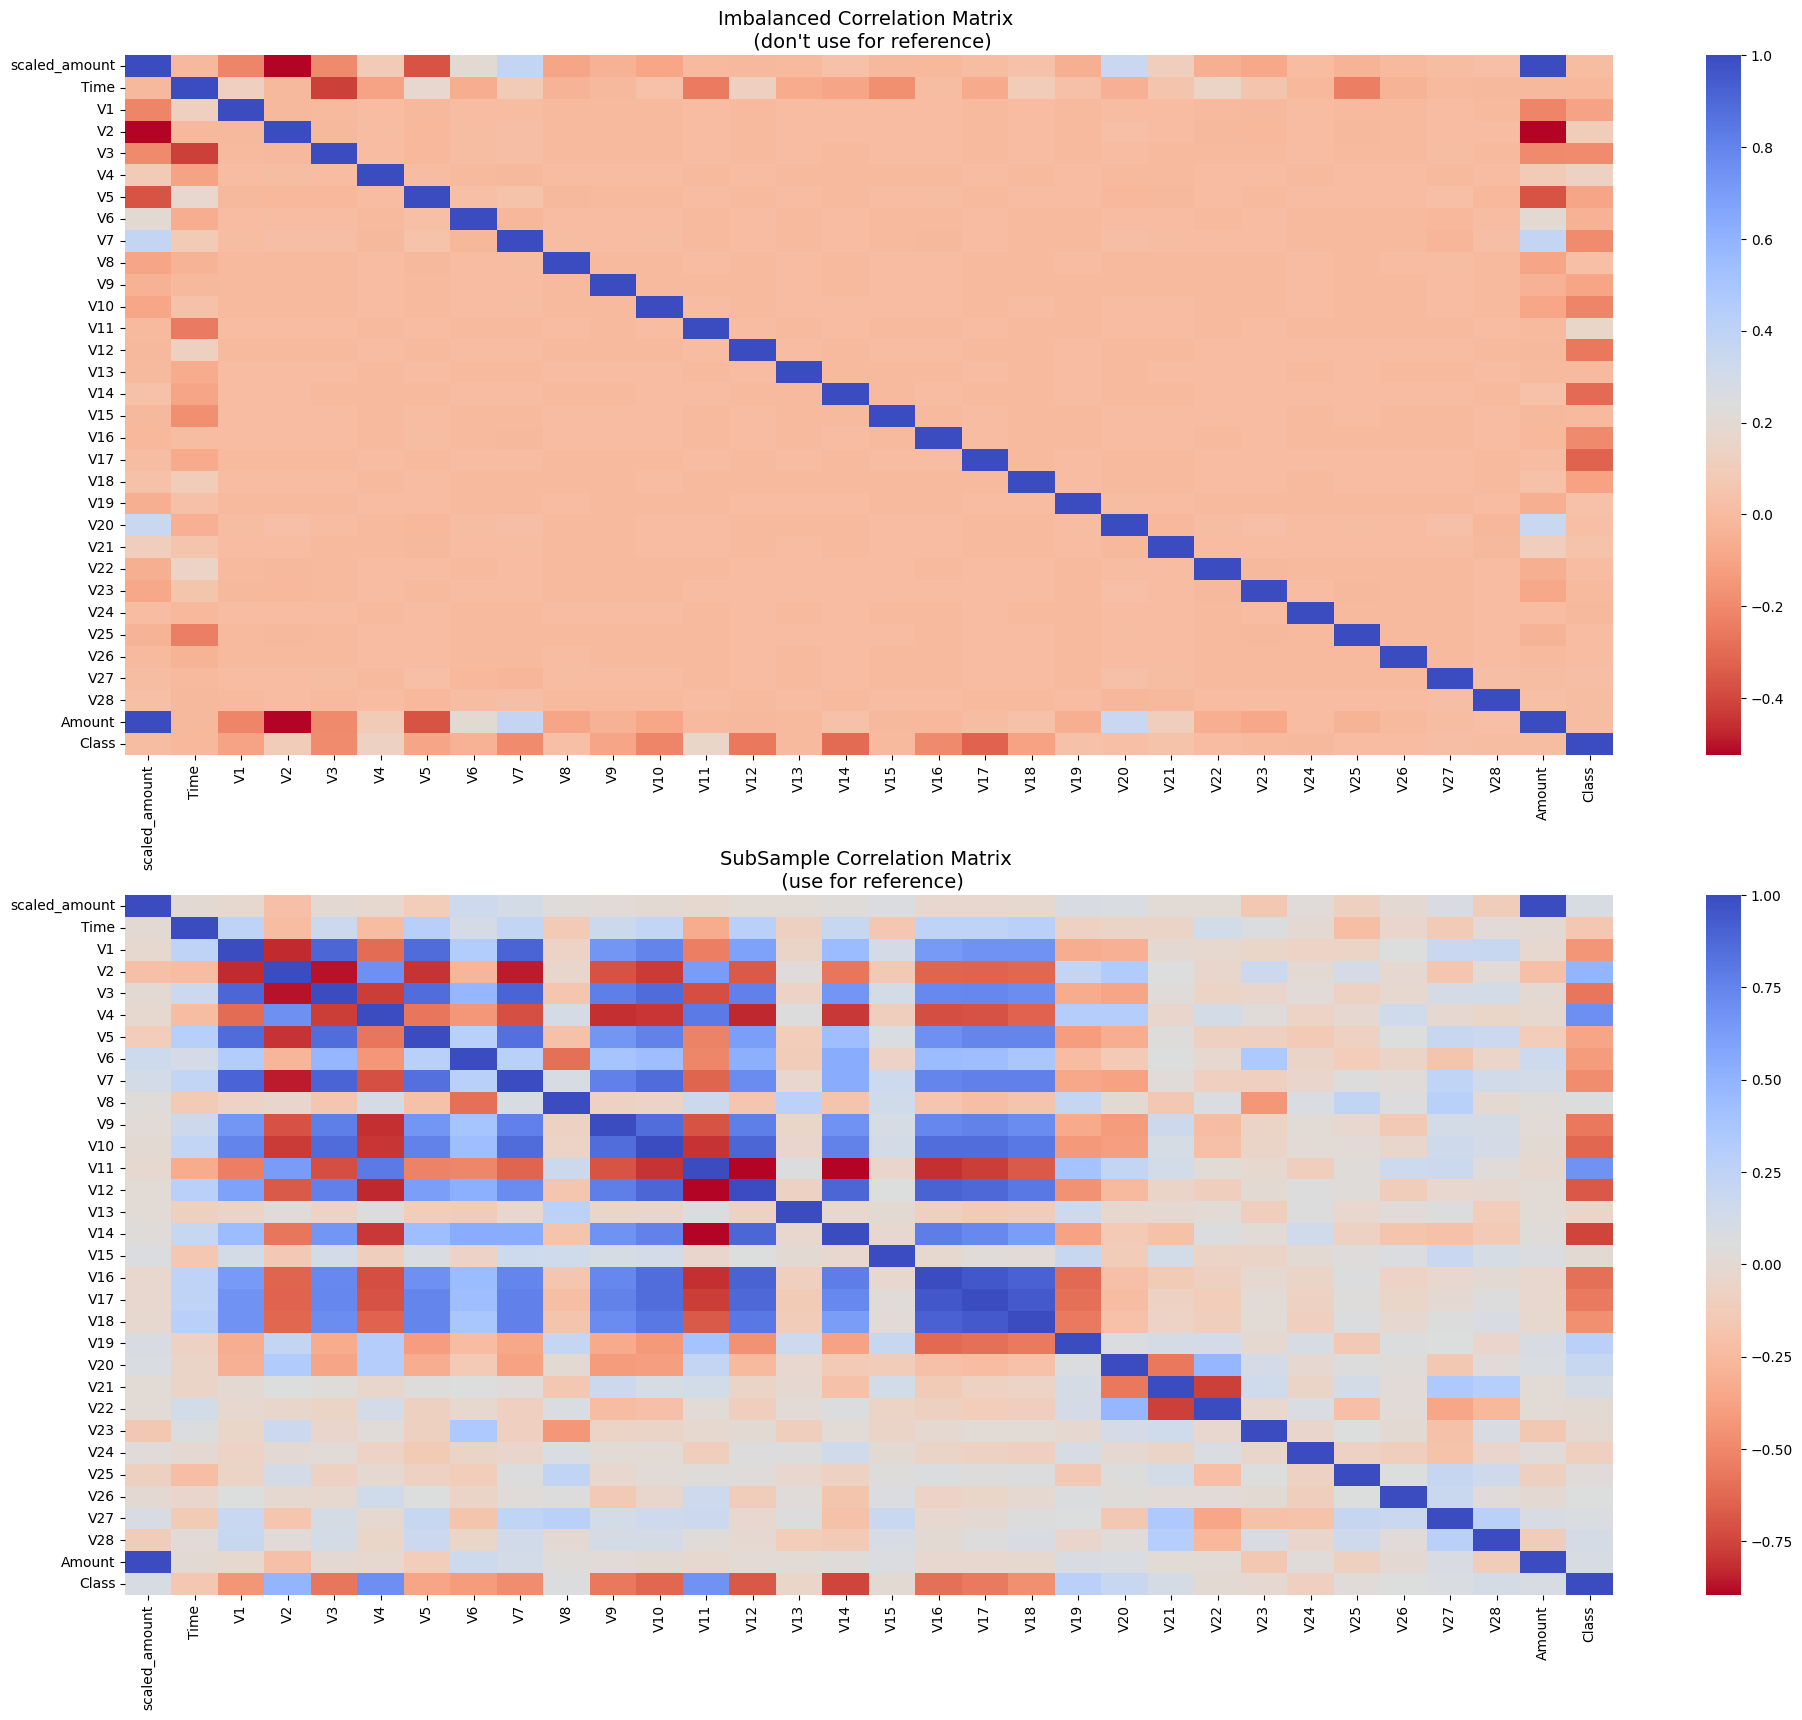

In [88]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Comparing the Correlation Between Datasets-

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# new_df
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

Here we calculate the correlation between two input columns of the dataframe. Whether they are related or not is determined by a threshold, which is 0.5 by default but can also be changed according to one's needs.

Negative means inversely related and positive means directly related. This helps us in knowing which all rows to eliminate.

In [89]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']

V10   -0.632599
V12   -0.687201
V14   -0.747871
Name: Class, dtype: float64

In [90]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class>0.5]['Class']

V4       0.701052
V11      0.684281
Class    1.000000
Name: Class, dtype: float64

V4, V11 are our highly positively correlated features and V10, V12, V14 have high negative correlation with **class**, now we do outlier analysis and removal.

-Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)

We use seaborn boxplot for our visualization.

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

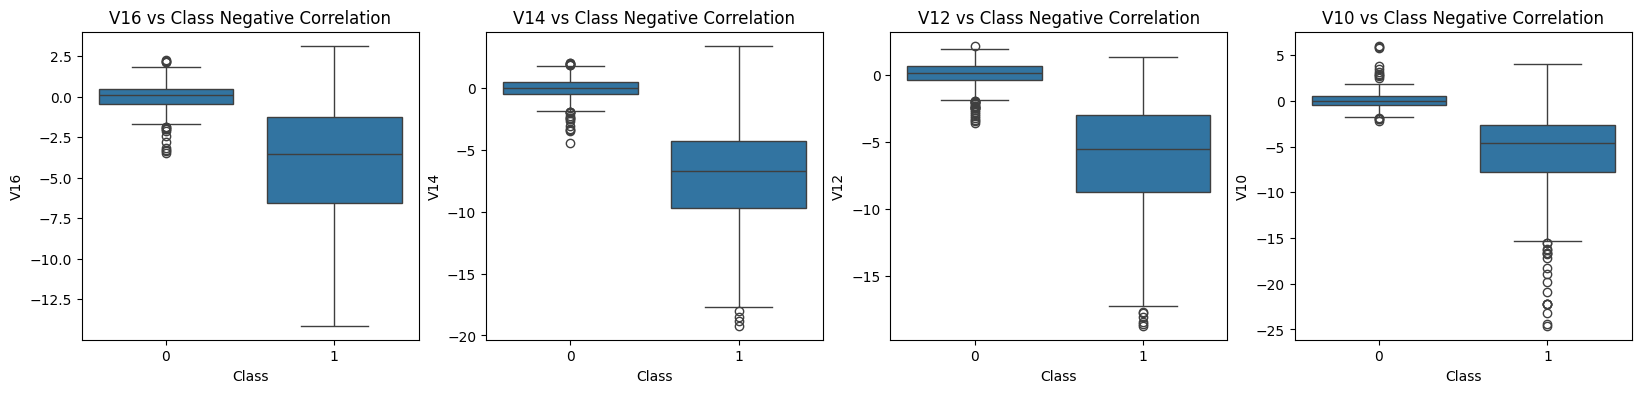

In [91]:
f, axes = plt.subplots(ncols=4,figsize=(20,4))

#Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)
sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

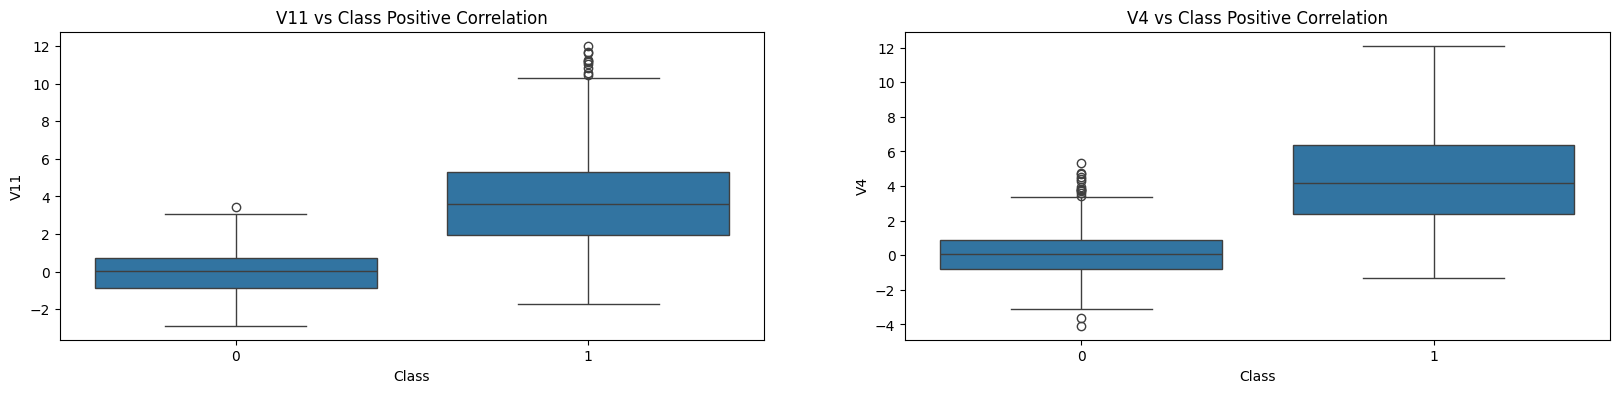

In [92]:
f, axes = plt.subplots(ncols=2,figsize=(20,4))

#Positive correlations (the higher the feature the probability of a fraud transaction increases)
sns.boxplot(x='Class',y='V11',data=new_df, ax = axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df, ax = axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

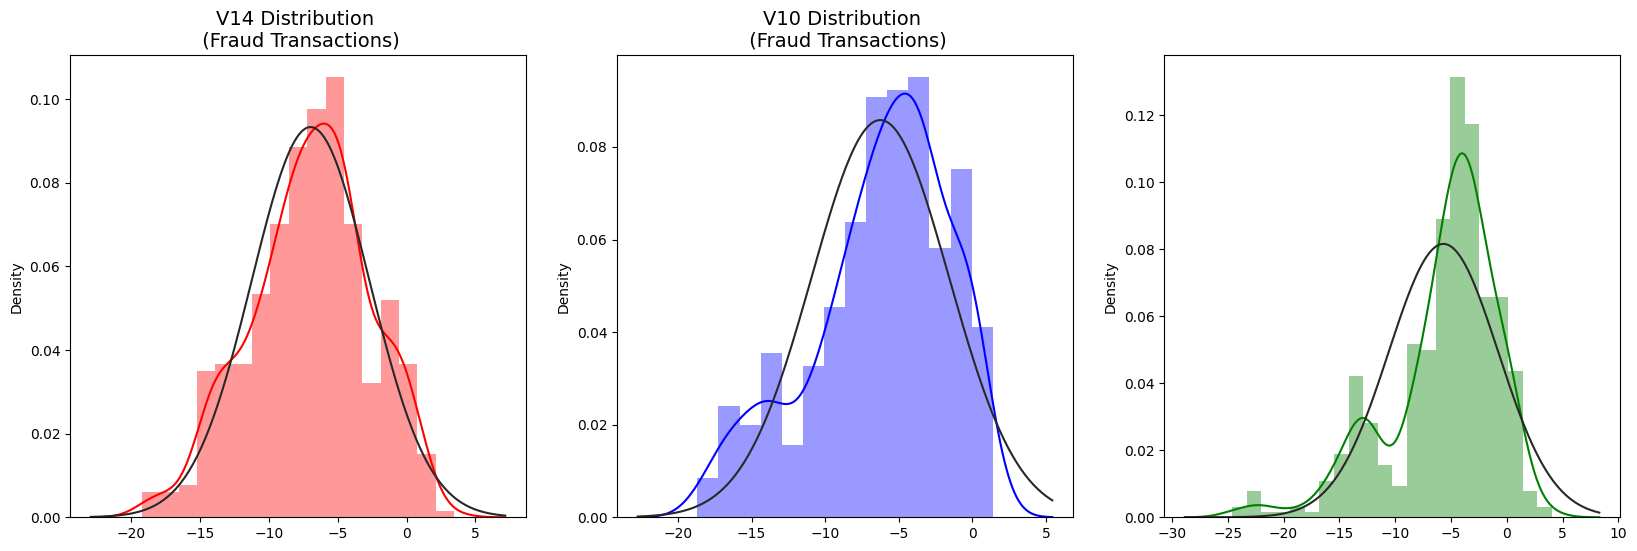

In [93]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1,fit=norm, color='red')
ax1.set_title('V14 Distribution \n (Fraud Transactions)',fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2,fit=norm, color='blue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)',fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3,fit=norm, color='green')
ax2.set_title('V10 Distribution \n (Fraud Transactions)',fontsize=14)

5. **REMOVING OUTLIERS-**
We will use interquatile range to remove outliers from highly correlated features

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

* Q1 represents the 25th percentile of the data.
* Q2 represents the 50th percentile of the data.
* Q3 represents the 75th percentile of the data.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

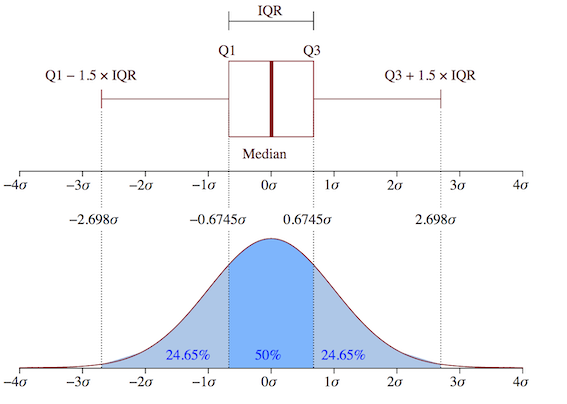

In [94]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 =np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr =q75 - q25
v14_cut_off =v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Feature V14 Outliers for Fraud Cases: 4
Feature V12 Outliers for Fraud Cases: 4
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 946


Text(0, -12, 'Fewer extreme \n outliers')

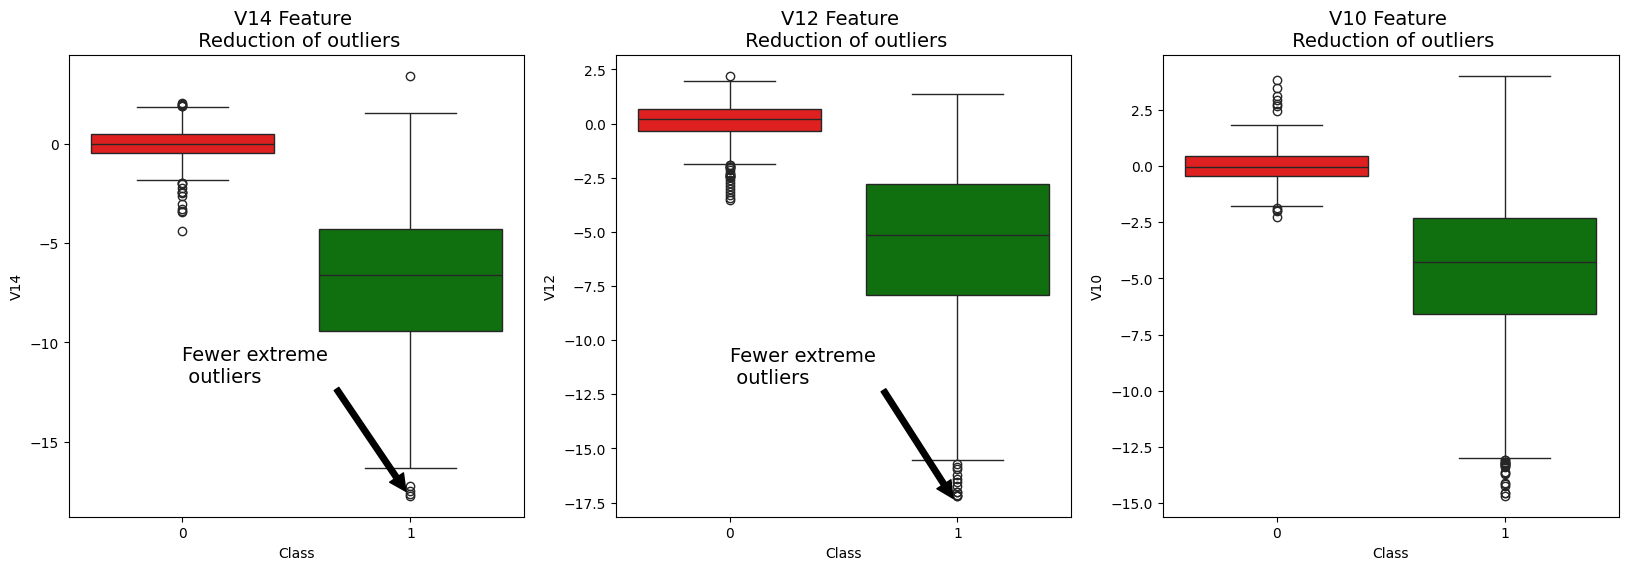

In [95]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

colors = ['red','green']

#feature V14
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax1,palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature v12
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature V10
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

6. **DIMENSIONALITY REDUCTION VISUALIZATION-**

We have a data that is high dimensional and visualising any patterns in higher than 3 is not possible so to see how our data would look like we are going to use dimensionality reduction techniques for visualisation of our data, we are going to use.
* Principal Component Analysis(PCA)
* TruncatedSVD

In [104]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

X = new_df.drop('Class',axis=1)
y = new_df['Class']

#TSNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1-t0))

#PCA implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1-t0))

#TruncatedSVD implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1-t0))

T-SNE took 1.8 s
PCA took 0.0016 s
Truncated SVD took 0.0024 s


As we plot are reduced dimension fetures we can see there is a decison boundary for model to learn visible in the 2-D projections.

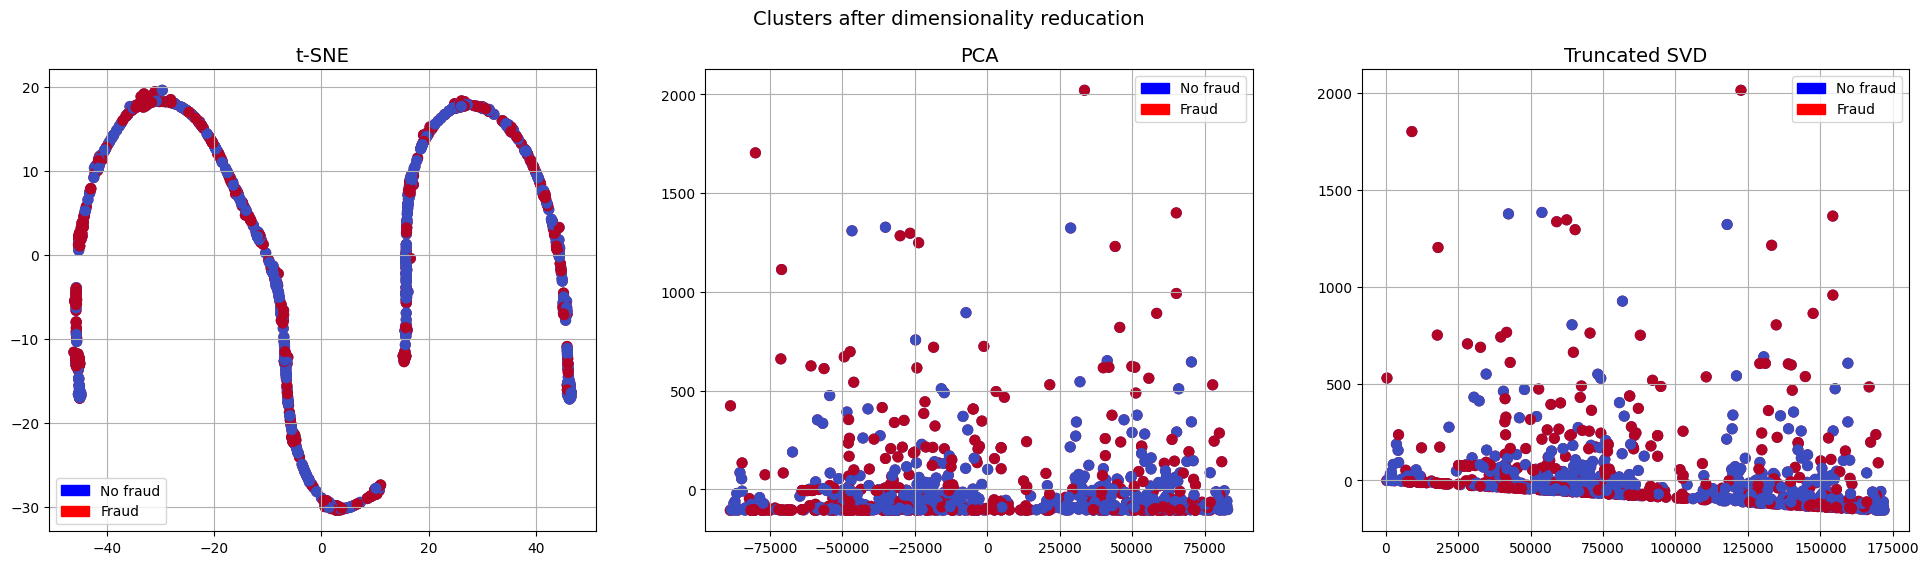

In [105]:
import matplotlib.patches as mpatches

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters after dimensionality reducation',fontsize=14)

blue_patch = mpatches.Patch(color='blue',label = 'No fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

## IMPLEMENTING MODELS

In [106]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
#converting to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [108]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)
X.columns

X_shapes:
 X_train: X_test:
 (756, 31) (190, 31) 

Y_shapes:
 Y_train: Y_test:
 (756,) (190,)


Index(['scaled_amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

I will apply classification models and calculate the cross-validation score to identify the best fit for our data.

Some of the models that I am going to use are-
* LogisticRegression
* KNeighborsClassifier
* Support Vector Classifier
* DecisionTreeClassifier

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

We are going to use sklearn *cross_val_score* to compare model performances, for this we will see which model has the best mean average accuracy over a given number of *folds*.

In [111]:
from sklearn.model_selection import cross_val_score


for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression has a training score of 94.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 62.0 % accuracy score
Classifier:  SVC has a training score of 56.00000000000001 % accuracy score
Classifier:  DecisionTreeClassifier has a training score of 89.0 % accuracy score


Logistic regression appears to be working best for us.

**Hyperparameter search using *GridSearch***

Now we try to look for the best set of hyperparameters for models using gridsearch.

In [114]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [115]:
print(log_reg,'\n', knears_neighbors,'\n' ,svc,'\n', tree_clf)

LogisticRegression(C=1) 
 KNeighborsClassifier(n_neighbors=4) 
 SVC(C=0.9, kernel='linear') 
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


## Validation
Now we have our best set of models trained using gridsearch. Now we move on to testing them on different metrics so as to know which one works best overall for us.

1. log_reg
2. knears_negihbors
3. svc
4. tree_clf

Evaluate model using:
* Cross_val_score
* ROC AUC Score
* ROC Curve
* Confusion Matrix, Classification report
* Average precison score, Area under precision-recall curve

Now we find cross_validation scores for the models we got using GridsearchCV, use *log_reg*, *knears_negihbors*, *svc* and *tree_clf* in the below cell.

In [116]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.05%
Knears Neighbors Cross Validation Score 62.29%
Support Vector Classifier Cross Validation Score 89.94%
DecisionTree Classifier Cross Validation Score 92.33%


Logistic regression** has the best cross validation score.

Now calculate *roc_auc_score* and also plot it.

In [117]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)

tree_pred = tree_clf.predict(X_test)

In [118]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred))

Logistic Regression:  0.9236359570661895
KNears Neighbors:  0.6811270125223613
Support Vector Classifier:  0.8741055456171735
Decision Tree Classifier:  0.9188282647584973


## Plot The Curves

In [119]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)

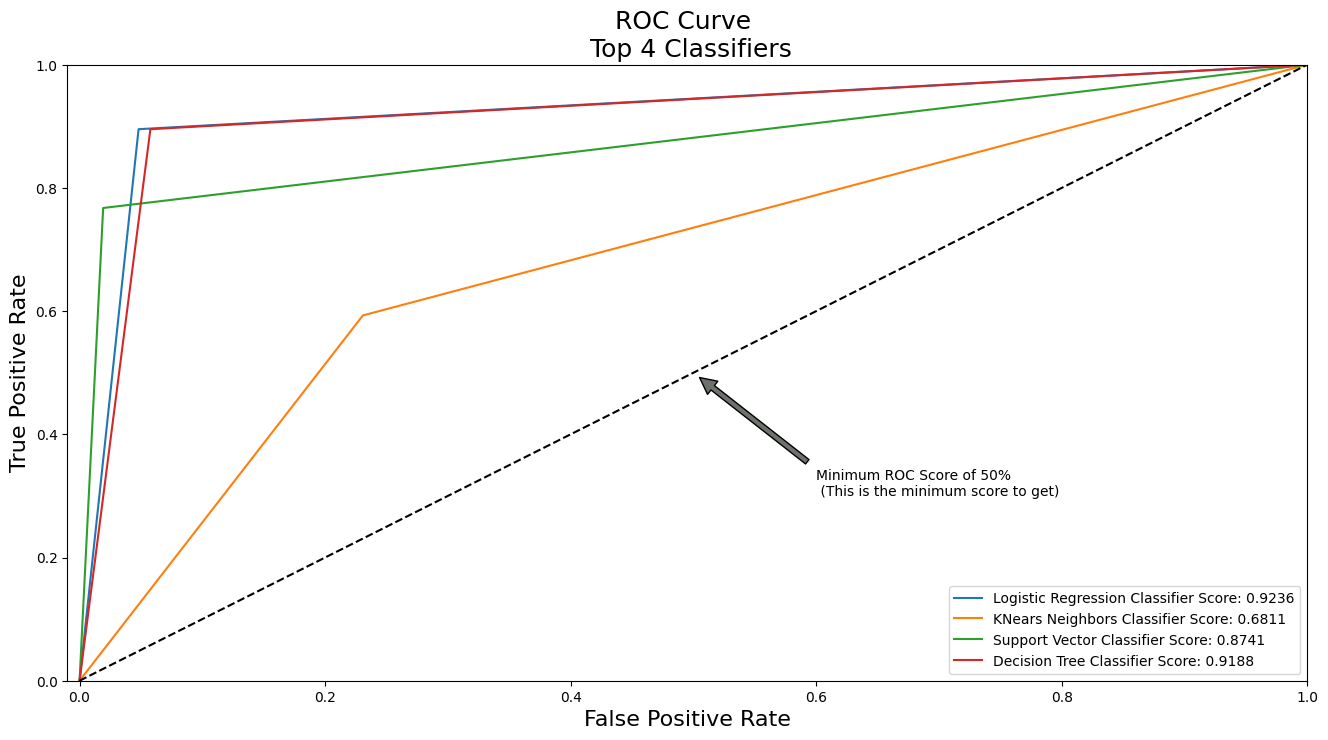

In [120]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

Logistic Regression has better ROC AUC Score and we can see that from the Curve as well, it is the best model till now.

Now, calculate the confusion matrix and classification report to do some quantitative evaluation on the validation set.

[Text(0, 0.5, ''), Text(0, 1.5, '')]

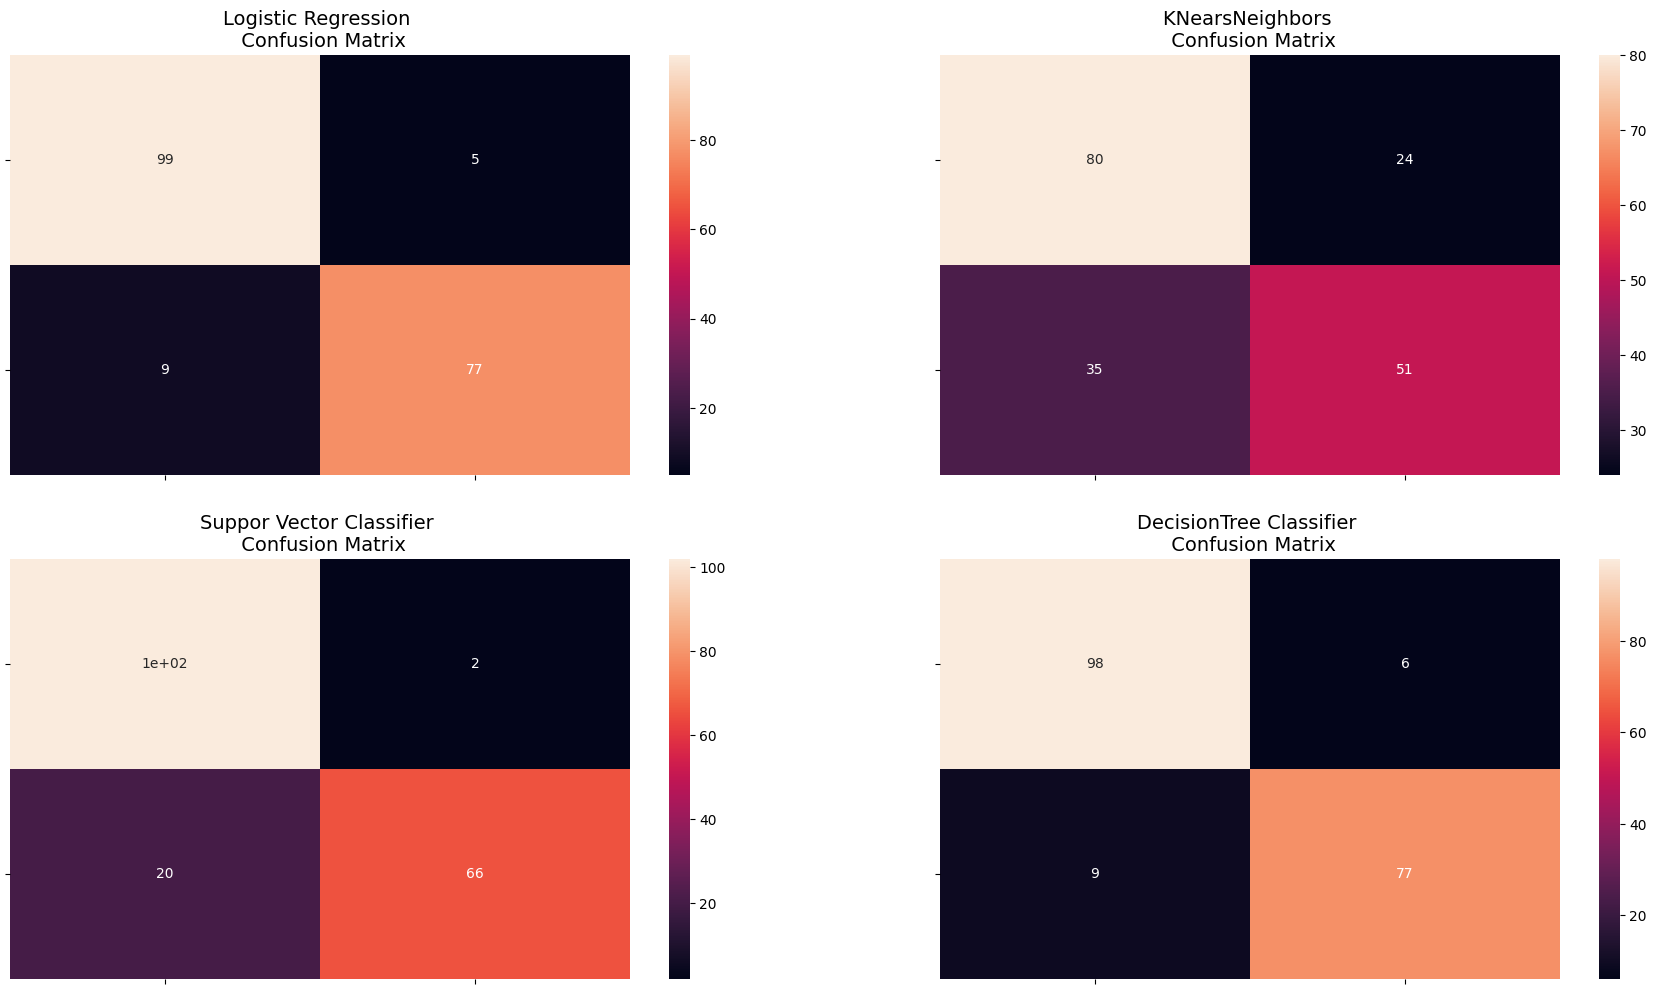

In [121]:
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

The confusion matrix heatmaps above show how our model is doing on the validation set from the undersampled data.

As we can see from the image above, values in the squares along the horizontal axis are the true values of a class, and cells along the vertical axis contain predicted values

As discussed above, we now know what our values in the confusion matrix above stand for, so now we'll calculate precision and recall for each class.

*  Precision = True Positive / (True Positive + False Positive)
*  Recall = True Positive / (True Positive + False Negative)
*  F1-Score = (2 * Precision * Recall) / (Precision + Recall)

It's evident that we need to look at recall to judge the best performing model since we want to reduce False negatives for class 1(fraud).

In [122]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       104
           1       0.94      0.90      0.92        86

    accuracy                           0.93       190
   macro avg       0.93      0.92      0.93       190
weighted avg       0.93      0.93      0.93       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       104
           1       0.68      0.59      0.63        86

    accuracy                           0.69       190
   macro avg       0.69      0.68      0.68       190
weighted avg       0.69      0.69      0.69       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       104
           1       0.97      0.77      0.86        86

    accuracy                           0.88       190
   macro avg       0.90      0.87      0.88       190
weighted

Here also we can see Logistic Regression outperfroms others.

## Testing
Now test our models on the original test data "***original_Xtest***".

In [123]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)

org_tree_pred = tree_clf.predict(original_Xtest)

and now we see confusion matrix for the same.

In [124]:
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
org_kneighbors_cf = confusion_matrix(original_ytest, org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest, org_svc_pred)
org_tree_cf = confusion_matrix(original_ytest,org_tree_pred)

print(org_log_reg_cf, '\n', org_kneighbors_cf, '\n', org_svc_cf, '\n', org_tree_cf )

[[54966  1895]
 [   11    87]] 
 [[46279 10582]
 [   51    47]] 
 [[56861     0]
 [   36    62]] 
 [[53907  2954]
 [   10    88]]


SVC has the least False negatives for the fraud class.

Classification report of the models-
As we can see, other models have comparable or better numbers in F1 or precision, but that is not the judgings; our recall of fraud class is what concerns us the most, and that we have th criterion for ue best for SVC.

In [125]:
print('Logistic Regression:')
print(classification_report(original_ytest, org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

print('Tree Classifier:')
print(classification_report(original_ytest, org_tree_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.04      0.89      0.08        98

    accuracy                           0.97     56959
   macro avg       0.52      0.93      0.53     56959
weighted avg       1.00      0.97      0.98     56959

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     56861
           1       0.00      0.48      0.01        98

    accuracy                           0.81     56959
   macro avg       0.50      0.65      0.45     56959
weighted avg       1.00      0.81      0.90     56959

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       1.00      0.63      0.78        98

    accuracy                           1.00     56959
   macro avg       1.00      0.82      0.89     56959
weighted

Thus, we can use the Logistic Regression Algorithm for Credit Card Fraud Detection.

## Logistic Regression
As we can see the recall for the Logistic Regression is the highest, I chose this Algorithm to be applied to my dataset prediction analysis.

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=150)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,150
,multi_class,'deprecated'


In [132]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
pred_train = classifier.predict(X_train)
report_train = classification_report(y_train,pred_train)
print(report_train)
pred_test = classifier.predict(X_test)
report_test = classification_report(y_test,pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       387
           1       0.97      0.91      0.94       369

    accuracy                           0.94       756
   macro avg       0.94      0.94      0.94       756
weighted avg       0.94      0.94      0.94       756

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       102
           1       0.99      0.93      0.96        88

    accuracy                           0.96       190
   macro avg       0.97      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



Test result confusion matrix is :
[[101   1]
 [  6  82]]


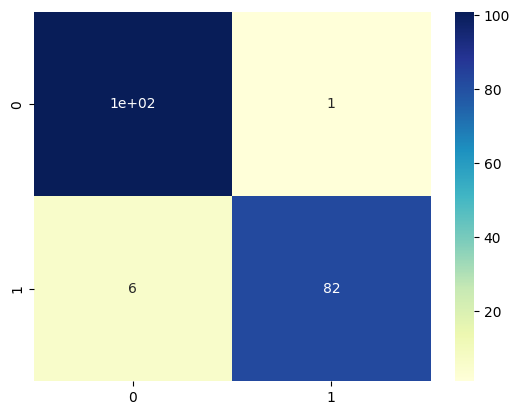


Pretty great , we only missed a few frauds from detection out of all , with around 94% safety improvement here

Precision :0.9439252336448598
Recall :0.9901960784313726
f1_score_test : 0.9665071770334928


In [134]:
from sklearn.metrics import confusion_matrix

conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=pred_test)
print("Test result confusion matrix is :")
print(conf_matrix_test)
sns.heatmap(data=conf_matrix_test, annot=True , cmap="YlGnBu")
plt.show()
print()
print("Pretty great , we only missed a few frauds from detection out of all , with around 94% safety improvement here")
print()
precision_test = ((conf_matrix_test[0][0])/(conf_matrix_test[1][0]+conf_matrix_test[0][0]))
print("Precision :"+str(precision_test))
recall_test = ((conf_matrix_test[0][0])/(conf_matrix_test[0][1]+conf_matrix_test[0][0]))
print("Recall :"+str(recall_test))
f1_score_test = ((2)/ ( (1/precision_test) + (1/recall_test) ))
print("f1_score_test : "+str(f1_score_test))

The F1 score is very good, hence my project is successful.

## Thank You!

Thank you for taking the time to go through my work.
I've done my best to implement and explain this project clearly, and I am always open to feedback or suggestions for improvement. As I continue learning, I look forward to refining this further and making it even better!